In [1]:
import pandas as pd

In [2]:
edge_df = pd.read_csv("EdgeTableUnion.csv")


In [3]:
s_gene = set(edge_df["start_gene_id"].values) 
e_gene = set(edge_df["end_gene_id"].values)

set_list = list(s_gene.union(e_gene))

In [39]:
edge_df_num = edge_df.loc[: , ["start_gene_id","end_gene_id","stringdb::score"]]
edge_df_num.rename(columns = {"start_gene_id" : "Node1","end_gene_id" : "Node2","stringdb::score" : "EdgeWeight"} , inplace = True)
edge_df_num = edge_df_num.dropna()

def edge_df_val(s):
    return gene_mapper_dict_rev[s]


edge_df_num["Node1"] = edge_df_num["Node1"].apply(edge_df_val)
edge_df_num["Node2"] = edge_df_num["Node2"].apply(edge_df_val)

In [4]:
set_list =  [x for x in set_list if str(x) != 'nan']

In [5]:
num_lst = [i for i in range(0,len(set_list))]

data = {
  "Number": num_lst,
  "Gene_id": set_list
}

gene_mapped_df= pd.DataFrame(data)

print(gene_mapped_df.shape) 



(167, 2)


In [6]:
gene_mapper_dict = {}
gene_mapper_dict_rev = {}
for j in range (0,len(num_lst)):
    gene_mapper_dict[j] = set_list[j]
    gene_mapper_dict_rev[set_list[j]] = j

In [7]:
node_df = pd.read_csv("df_merged.csv")

In [8]:
node_df.head()

,Unnamed: 0,SampleId,Target,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0,GSM1045191,Normal,5.640239,5.074866,4.191770,3.574706,2.312812,5.474018,7.392011,...,13.900585,13.491092,14.891877,14.749976,10.053204,5.152432,7.779721,2.312812,2.312812,2.312812
1,1,GSM1045192,Normal,3.557696,4.984593,4.269061,4.065623,2.409371,5.246784,6.061380,...,14.694493,14.482319,15.177010,15.107731,14.600338,10.401430,13.137754,2.312812,2.560414,2.312812
2,2,GSM1045193,Normal,3.132007,5.109481,4.131843,3.574706,2.312812,6.460169,5.862504,...,14.528211,14.321748,15.195278,15.129354,14.114741,10.409900,13.120571,2.312812,2.460930,2.312812
3,3,GSM1045194,Normal,6.865108,5.473609,3.616546,3.574706,2.312812,5.146087,5.954431,...,14.891396,14.796693,15.357952,15.360100,12.696520,7.505545,10.674244,2.312812,2.312812,2.312812
4,4,GSM1045195,Normal,4.955184,5.348400,4.296657,3.799293,2.349630,5.823408,7.679896,...,14.307755,13.950866,15.133403,15.021234,10.747295,5.964108,8.416851,2.312812,2.312812,2.312812


In [27]:
node_df_num = node_df.loc[: , set_list]

In [28]:
node_df_num.rename(columns = gene_mapper_dict_rev , inplace = True)

In [29]:
node_df_num["Target"] = node_df["Target"]

In [30]:
    
def Target_label(s):
    if s=="Normal":
        return 0
    else:
        return 1

node_df_num["Target"] = node_df_num["Target"].apply(Target_label)

In [31]:
node_df_num

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
0,4.795220,2.442983,3.208128,4.684887,9.578228,4.015619,2.323707,2.424941,2.483374,2.312812,...,3.421102,2.840083,4.977610,2.313734,3.820016,2.387828,3.743043,8.802983,2.673914,0
1,6.548039,2.332387,3.262016,4.204035,5.764318,4.795047,2.323707,3.717559,3.272839,2.421579,...,2.856117,2.754112,7.703812,3.233885,3.868170,2.452055,4.321150,9.788274,2.701524,0
2,8.932767,3.903118,3.448708,6.911178,8.746752,7.585631,2.323707,7.972610,2.555204,5.184202,...,6.472142,2.916658,10.182383,5.475946,3.868170,4.050996,4.081072,11.662551,2.629500,0
3,6.364842,2.393105,3.208128,4.973395,7.419028,4.515514,2.321022,2.936491,2.322323,2.312812,...,3.978722,2.508895,5.976277,3.233885,3.868170,2.540295,4.065369,8.700278,2.629500,0
4,4.010588,2.312812,2.774563,5.044224,9.681665,4.795047,2.323707,2.479243,2.926095,2.312812,...,2.878225,2.450330,4.477568,3.233885,3.868170,2.312812,3.314556,8.413782,3.162549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-0.054300,-1.202600,-0.461500,-0.331700,-0.492500,-0.068000,-1.971900,-2.805400,-1.613800,-5.554900,...,0.055900,-0.259100,-2.273500,-0.229400,-2.032200,-2.588200,0.407100,-0.118500,-0.535900,0
562,4.802000,2.995600,2.771600,2.418000,3.211400,4.114200,1.610600,4.652300,2.388100,2.626800,...,3.941200,2.208100,3.857600,1.139600,1.316800,3.541900,1.181400,2.259300,0.802200,1
563,-0.901000,-0.634100,0.189100,0.008900,-0.723100,0.293000,0.067800,-2.009200,0.946100,-4.907800,...,-4.870200,-5.317900,-2.531000,-0.423300,-1.189900,0.415700,-0.779700,-0.079300,-0.729800,0
564,2.003600,-0.374600,1.182000,1.363900,1.331300,0.204200,-0.008700,2.109600,1.247400,0.589300,...,0.787800,0.523700,0.553100,-0.070700,0.670000,1.703700,0.490000,0.998500,1.285400,1


In [32]:
imp_lst = [64,
 95,
 27,
 157,
 115,
 11,
 47,
 109,
 92,
 166,
 15,
 123,
 91,
 121,
 164,
 126,
 51,
 118,
 98,
 30,
 22,
 138,
 96,
 25,
 65,
 148,
 87,
 116,
 16,
 133,
 154,
 37,
 137,
 162,
 7,
 23,
 48,
 156,
 158,
 2,
 20,
 57,
 69,
 103,
 142,-1]

In [33]:
node_df_num = node_df_num.iloc[:,imp_lst]

In [36]:
node_df_num

,64,95,27,157,115,11,47,109,92,166,...,48,156,158,2,20,57,69,103,142,Target
0,3.502249,3.597345,5.254504,6.248788,2.312812,4.066303,3.161771,2.312812,2.312812,2.673914,...,2.312812,2.312812,3.421102,3.208128,2.312812,2.717504,2.312812,2.322885,2.810436,0
1,3.311215,4.364409,4.294768,7.030439,2.312812,5.926721,4.564338,2.312812,2.550378,2.701524,...,2.393997,2.312812,2.856117,3.262016,2.312812,2.496992,2.312812,2.322885,4.075389,0
2,3.574230,4.364409,4.858387,8.812783,2.312812,8.229013,6.036585,2.312812,5.659272,2.629500,...,2.933164,2.312812,6.472142,3.448708,2.312812,2.859565,2.408687,2.322885,5.347972,0
3,3.412597,3.597345,3.829174,5.989544,2.312812,5.688457,3.744939,2.590152,2.652008,2.629500,...,2.393997,2.409614,3.978722,3.208128,2.312812,2.766232,2.312812,2.524811,3.211367,0
4,3.502249,3.602100,4.408513,6.236235,2.312812,5.466147,3.430098,2.312812,2.312812,3.162549,...,2.337405,2.312812,2.878225,2.774563,2.312812,2.717504,2.312812,2.322885,2.562224,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-3.031400,-1.505100,-0.592900,-0.207600,0.506800,-0.871200,1.217600,-1.567000,-0.829000,-0.535900,...,-1.504000,-4.516700,0.055900,-0.461500,0.327300,0.587300,-2.810700,-0.970900,-2.548400,0
562,2.808800,5.256600,1.228600,3.449900,3.447000,4.647600,1.353200,1.957100,4.156800,0.802200,...,4.393200,2.541800,3.941200,2.771600,-0.838200,2.601400,4.737900,2.877600,4.314100,1
563,-2.813000,-1.082700,-0.245900,-0.324500,-0.107200,-1.082900,1.857000,-2.162000,-1.143700,-0.729800,...,-2.994300,0.215100,-4.870200,0.189100,-1.992800,-1.157300,-2.944800,-0.807700,-0.465600,0
564,0.935000,2.798500,-0.686900,1.723800,1.577100,1.860200,-0.417600,0.012300,2.361200,1.285400,...,1.965600,1.151900,0.787800,1.182000,-1.132400,0.702100,2.350900,-0.518200,1.963000,1


Epoch 0, Loss: 3.8676, Test Accuracy: 0.6491
Epoch 10, Loss: 0.5462, Test Accuracy: 0.5965
Epoch 20, Loss: 0.5289, Test Accuracy: 0.7544
Epoch 30, Loss: 0.4566, Test Accuracy: 0.6930
Epoch 40, Loss: 0.4120, Test Accuracy: 0.6491
Epoch 50, Loss: 0.3854, Test Accuracy: 0.7105
Epoch 60, Loss: 0.3630, Test Accuracy: 0.7018
Epoch 70, Loss: 0.3432, Test Accuracy: 0.7368
Epoch 80, Loss: 0.3285, Test Accuracy: 0.7544
Epoch 90, Loss: 0.3164, Test Accuracy: 0.7544
Epoch 100, Loss: 0.3063, Test Accuracy: 0.7719
Epoch 110, Loss: 0.2972, Test Accuracy: 0.7632
Epoch 120, Loss: 0.2880, Test Accuracy: 0.7719
Epoch 130, Loss: 0.2788, Test Accuracy: 0.7632
Epoch 140, Loss: 0.2707, Test Accuracy: 0.7544
Epoch 150, Loss: 0.2626, Test Accuracy: 0.7368
Epoch 160, Loss: 0.2557, Test Accuracy: 0.7368
Epoch 170, Loss: 0.2515, Test Accuracy: 0.7456
Epoch 180, Loss: 0.2458, Test Accuracy: 0.7105
Epoch 190, Loss: 0.2427, Test Accuracy: 0.7193


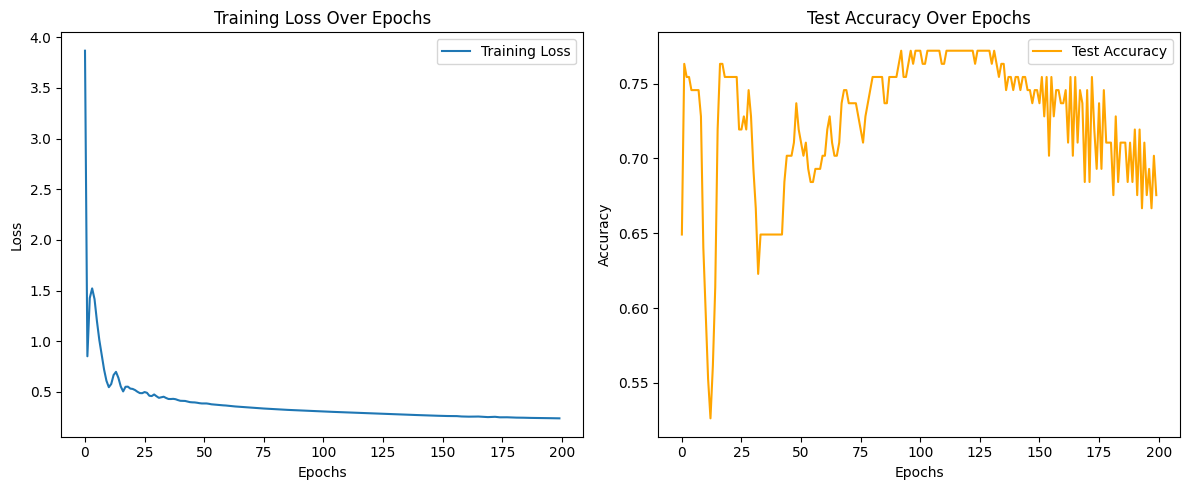

In [51]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt

SEED = 63

np.random.seed(SEED)
torch.manual_seed(SEED)

# Load the edge list dataframe
def load_edge_list(edge_list_df):
    edge_index = edge_list_df[['Node1', 'Node2']].values.T
    edge_weight = edge_list_df['EdgeWeight'].values
    
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    return edge_index, edge_weight

# Load the node features dataframe
def load_node_features(node_features_df):
    features = node_features_df.drop(columns=['Target']).values
    labels = node_features_df['Target'].values
    
    node_features = torch.tensor(features, dtype=torch.float)
    labels = torch.tensor(labels, dtype=torch.long)
    
    return node_features, labels

# Define the GNN model
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        
    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        return x

# Load edge list and node features (replace with actual DataFrames)
edge_index, edge_weight = load_edge_list(edge_df_num)
node_features, labels = load_node_features(node_df_num)

# Ensure that node indices in edge_index are within the range of available nodes
max_node_idx = node_features.shape[0] - 1
edge_index = edge_index[:, (edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]
edge_weight = edge_weight[(edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]

# Split the data into training and testing sets (80-20 split)
train_indices, test_indices = train_test_split(range(node_features.shape[0]), test_size=0.2, random_state=42)

#train_indices = train_indices + list(range(len(node_df_num),len(df_combined)))

# Function to filter edges based on the available nodes in train/test sets
def filter_edges(edge_index, edge_weight, node_indices):
    mask = torch.isin(edge_index[0], node_indices) & torch.isin(edge_index[1], node_indices)
    filtered_edge_index = edge_index[:, mask]
    filtered_edge_weight = edge_weight[mask]
    return filtered_edge_index, filtered_edge_weight

# Filter edges for the training and testing sets
train_edge_index, train_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(train_indices))
test_edge_index, test_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(test_indices))

# Create new node mappings for train and test sets
def create_node_mapping(indices):
    return {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}

train_node_mapping = create_node_mapping(train_indices)
test_node_mapping = create_node_mapping(test_indices)

# Remap edge indices
def remap_edges(edge_index, node_mapping):
    return torch.tensor([[node_mapping[idx.item()] for idx in edge_index[0]],
                         [node_mapping[idx.item()] for idx in edge_index[1]]])

train_edge_index = remap_edges(train_edge_index, train_node_mapping)
test_edge_index = remap_edges(test_edge_index, test_node_mapping)

# Create Data objects for training and testing sets
train_data = Data(x=node_features[train_indices], edge_index=train_edge_index, edge_attr=train_edge_weight, y=labels[train_indices])
test_data = Data(x=node_features[test_indices], edge_index=test_edge_index, edge_attr=test_edge_weight, y=labels[test_indices])

# Initialize the model, optimizer, and loss function
num_node_features = node_features.shape[1]
hidden_channels = 16
num_classes = len(torch.unique(labels))

model = GCN(num_node_features, hidden_channels, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Lists to store loss and accuracy for plotting
losses = []
accuracies = []

# Training function
def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing function
def test(data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
        pred = out.argmax(dim=1)
        correct = (pred == data.y).sum()
        acc = int(correct) / len(data.y)
    return acc
    
# Train the model
epochs = 200
for epoch in range(epochs):
    loss = train(train_data)
    acc = test(test_data)
    losses.append(loss)
    accuracies.append(acc)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='orange')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
import numpy as np
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

# Assume node_df_num is your original DataFrame
X = node_df_num.iloc[:, :-1].values  # Features
y = node_df_num.iloc[:, -1].values   # Target

# Normalize data for GAN training
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Separate data by class
class_data = {label: X_tensor[y_tensor == label] for label in np.unique(y)}

# GAN Parameters
latent_dim = 100
input_dim = X_scaled.shape[1]
epochs = 2000
batch_size = 64
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()  # Assuming scaled data
        )

    def forward(self, z):
        return self.net(z)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# Training GAN
def train_gan(data, generator, discriminator, epochs, batch_size):
    # Optimizers and loss
    optim_gen = optim.Adam(generator.parameters(), lr=0.0002)
    optim_disc = optim.Adam(discriminator.parameters(), lr=0.0002)
    criterion = nn.BCELoss()

    for epoch in range(epochs):
        for real_data in DataLoader(data, batch_size=batch_size, shuffle=True):
            # Real Data
            real_data = real_data.to(device)
            batch_size = real_data.size(0)
            real_labels = torch.ones(batch_size, 1, device=device)
            fake_labels = torch.zeros(batch_size, 1, device=device)

            # Train Discriminator
            noise = torch.randn(batch_size, latent_dim, device=device)
            fake_data = generator(noise)
            real_pred = discriminator(real_data)
            fake_pred = discriminator(fake_data.detach())
            loss_disc = criterion(real_pred, real_labels) + criterion(fake_pred, fake_labels)
            optim_disc.zero_grad()
            loss_disc.backward()
            optim_disc.step()

            # Train Generator
            noise = torch.randn(batch_size, latent_dim, device=device)
            fake_data = generator(noise)
            fake_pred = discriminator(fake_data)
            loss_gen = criterion(fake_pred, real_labels)
            optim_gen.zero_grad()
            loss_gen.backward()
            optim_gen.step()

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss D: {loss_disc.item()}, Loss G: {loss_gen.item()}")

# Generate synthetic data
def generate_samples(generator, num_samples):
    noise = torch.randn(num_samples, latent_dim, device=device)
    synthetic_data = generator(noise)
    return synthetic_data.cpu().detach().numpy()

# Train a GAN for each class
synthetic_data = []
for label, data in class_data.items():
    generator = Generator(latent_dim, input_dim).to(device)
    discriminator = Discriminator(input_dim).to(device)
    train_gan(data, generator, discriminator, epochs, batch_size)
    synthetic_samples = generate_samples(generator, len(data))  # Generate synthetic samples
    synthetic_labels = np.full((synthetic_samples.shape[0],), label)  # Assign the same label
    synthetic_data.append((synthetic_samples, synthetic_labels))

# Combine original and synthetic data
synthetic_data_s = np.vstack([s[0] for s in synthetic_data])
synthetic_labels = np.concatenate([s[1] for s in synthetic_data])

X_combined = np.vstack([X_scaled, synthetic_data_s])
y_combined = np.concatenate([y, synthetic_labels])

# Add synthetic indicator
synthetic_indicator = np.concatenate([np.zeros(X_scaled.shape[0]), np.ones(synthetic_data_s.shape[0])])

# Create a DataFrame
df_combined_new = pd.DataFrame(scaler.inverse_transform(X_combined), columns=node_df_num.columns[:-1])
df_combined_new['Target'] = y_combined
df_combined_new['synthetic'] = synthetic_indicator

print(df_combined_new.head())


Epoch 100/2000, Loss D: 1.412064790725708, Loss G: 0.8110625147819519
Epoch 200/2000, Loss D: 1.341623306274414, Loss G: 0.7897129654884338
Epoch 300/2000, Loss D: 0.980292797088623, Loss G: 0.5793243646621704
Epoch 400/2000, Loss D: 1.1940534114837646, Loss G: 1.655146598815918
Epoch 500/2000, Loss D: 1.3933947086334229, Loss G: 1.1581956148147583
Epoch 600/2000, Loss D: 1.441983938217163, Loss G: 0.8121795654296875
Epoch 700/2000, Loss D: 0.9299740791320801, Loss G: 0.5229202508926392
Epoch 800/2000, Loss D: 1.200566053390503, Loss G: 0.8919679522514343
Epoch 900/2000, Loss D: 1.1496188640594482, Loss G: 0.6992101669311523
Epoch 1000/2000, Loss D: 1.8894299268722534, Loss G: 1.1706223487854004
Epoch 1100/2000, Loss D: 1.0477485656738281, Loss G: 0.5495278835296631
Epoch 1200/2000, Loss D: 1.3545401096343994, Loss G: 0.8605453968048096
Epoch 1300/2000, Loss D: 1.599179744720459, Loss G: 1.328356385231018
Epoch 1400/2000, Loss D: 1.341705322265625, Loss G: 0.9188617467880249
Epoch 1500

In [47]:
df_combined_new = df_combined_new.iloc[:,:-1]

In [48]:
df_combined_new

,64,95,27,157,115,11,47,109,92,166,...,48,156,158,2,20,57,69,103,142,Target
0,3.502249,3.597345,5.254504,6.248788,2.312812,4.066303,3.161771,2.312812,2.312812,2.673914,...,2.312812,2.312812,3.421102,3.208128,2.312812,2.717504,2.312812,2.322885,2.810436,0
1,3.311215,4.364409,4.294768,7.030439,2.312812,5.926721,4.564338,2.312812,2.550378,2.701524,...,2.393997,2.312812,2.856117,3.262016,2.312812,2.496992,2.312812,2.322885,4.075389,0
2,3.574230,4.364409,4.858387,8.812783,2.312812,8.229013,6.036585,2.312812,5.659272,2.629500,...,2.933164,2.312812,6.472142,3.448708,2.312812,2.859565,2.408687,2.322885,5.347972,0
3,3.412597,3.597345,3.829174,5.989544,2.312812,5.688457,3.744939,2.590152,2.652008,2.629500,...,2.393997,2.409614,3.978722,3.208128,2.312812,2.766232,2.312812,2.524811,3.211367,0
4,3.502249,3.602100,4.408513,6.236235,2.312812,5.466147,3.430098,2.312812,2.312812,3.162549,...,2.337405,2.312812,2.878225,2.774563,2.312812,2.717504,2.312812,2.322885,2.562224,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,4.194844,4.700313,6.663678,8.695516,1.865601,5.381534,6.428283,2.452155,5.576894,3.110626,...,3.355650,3.317609,6.166360,3.423545,2.494792,2.861386,3.650377,1.483246,4.265891,1
1128,6.754455,7.752499,9.008573,11.544672,5.265131,7.606841,9.442310,3.282494,9.141376,5.475507,...,7.565872,6.606242,9.057100,7.045608,4.749370,5.790434,6.932244,2.939471,7.950049,1
1129,1.032834,1.608257,1.309555,1.659790,-0.028867,1.257166,1.260063,0.373560,3.128361,0.422696,...,1.886553,1.860510,3.378441,0.434435,-0.587952,0.727013,1.926090,-0.858871,1.011393,1
1130,3.599565,5.662126,7.285925,10.972131,0.677162,6.222276,5.203827,1.883834,6.522273,4.466958,...,5.639049,3.085878,7.772715,3.732159,0.352518,0.534221,4.290611,2.283288,4.672988,1


Epoch 0, Loss: 2.6983, Test Accuracy: 0.7930
Epoch 10, Loss: 0.4200, Test Accuracy: 0.7974
Epoch 20, Loss: 0.4015, Test Accuracy: 0.8238
Epoch 30, Loss: 0.3562, Test Accuracy: 0.8282
Epoch 40, Loss: 0.3073, Test Accuracy: 0.8414
Epoch 50, Loss: 0.2763, Test Accuracy: 0.8678
Epoch 60, Loss: 0.2369, Test Accuracy: 0.9207
Epoch 70, Loss: 0.2049, Test Accuracy: 0.9075
Epoch 80, Loss: 0.1906, Test Accuracy: 0.9075
Epoch 90, Loss: 0.1791, Test Accuracy: 0.9119
Epoch 100, Loss: 0.1690, Test Accuracy: 0.9075
Epoch 110, Loss: 0.1602, Test Accuracy: 0.9163
Epoch 120, Loss: 0.1538, Test Accuracy: 0.9163
Epoch 130, Loss: 0.1493, Test Accuracy: 0.9163
Epoch 140, Loss: 0.1467, Test Accuracy: 0.9207
Epoch 150, Loss: 0.1432, Test Accuracy: 0.9207
Epoch 160, Loss: 0.1401, Test Accuracy: 0.9207
Epoch 170, Loss: 0.1376, Test Accuracy: 0.9207
Epoch 180, Loss: 0.1353, Test Accuracy: 0.9119
Epoch 190, Loss: 0.1335, Test Accuracy: 0.9119


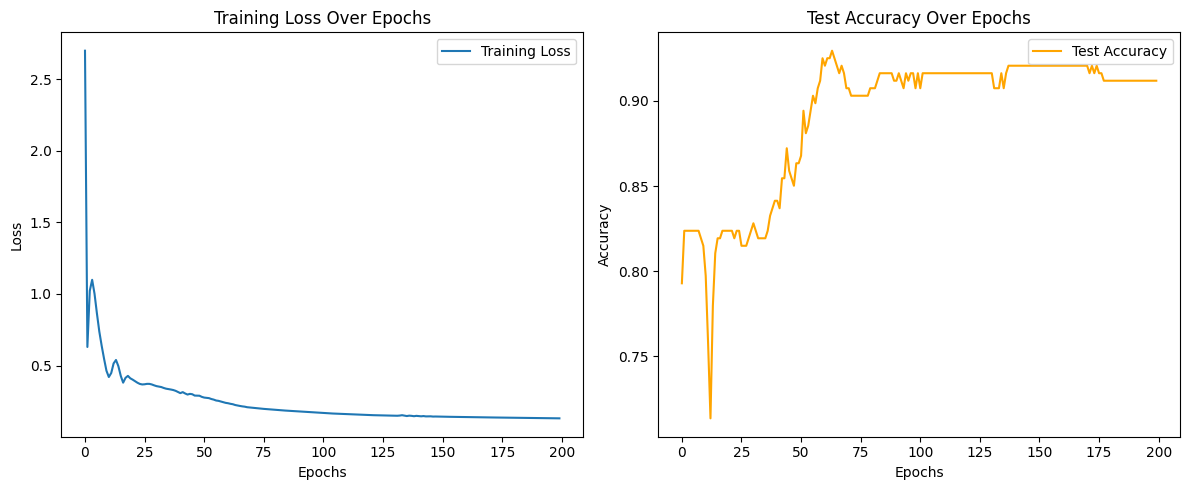

In [64]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt

SEED = 63

np.random.seed(SEED)
torch.manual_seed(SEED)

# Load the edge list dataframe
def load_edge_list(edge_list_df):
    edge_index = edge_list_df[['Node1', 'Node2']].values.T
    edge_weight = edge_list_df['EdgeWeight'].values
    
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    return edge_index, edge_weight

# Load the node features dataframe
def load_node_features(node_features_df):
    features = node_features_df.drop(columns=['Target']).values
    labels = node_features_df['Target'].values
    
    node_features = torch.tensor(features, dtype=torch.float)
    labels = torch.tensor(labels, dtype=torch.long)
    
    return node_features, labels

# Define the GNN model
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        
    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        return x

# Load edge list and node features (replace with actual DataFrames)
edge_index, edge_weight = load_edge_list(edge_df_num)
node_features, labels = load_node_features(df_combined_new)

# Ensure that node indices in edge_index are within the range of available nodes
max_node_idx = node_features.shape[0] - 1
edge_index = edge_index[:, (edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]
edge_weight = edge_weight[(edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]

# Split the data into training and testing sets (80-20 split)
train_indices, test_indices = train_test_split(range(node_features.shape[0]), test_size=0.2, random_state=42)

#train_indices = train_indices + list(range(len(node_df_num),len(df_combined)))

# Function to filter edges based on the available nodes in train/test sets
def filter_edges(edge_index, edge_weight, node_indices):
    mask = torch.isin(edge_index[0], node_indices) & torch.isin(edge_index[1], node_indices)
    filtered_edge_index = edge_index[:, mask]
    filtered_edge_weight = edge_weight[mask]
    return filtered_edge_index, filtered_edge_weight

# Filter edges for the training and testing sets
train_edge_index, train_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(train_indices))
test_edge_index, test_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(test_indices))

# Create new node mappings for train and test sets
def create_node_mapping(indices):
    return {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}

train_node_mapping = create_node_mapping(train_indices)
test_node_mapping = create_node_mapping(test_indices)

# Remap edge indices
def remap_edges(edge_index, node_mapping):
    return torch.tensor([[node_mapping[idx.item()] for idx in edge_index[0]],
                         [node_mapping[idx.item()] for idx in edge_index[1]]])

train_edge_index = remap_edges(train_edge_index, train_node_mapping)
test_edge_index = remap_edges(test_edge_index, test_node_mapping)

# Create Data objects for training and testing sets
train_data = Data(x=node_features[train_indices], edge_index=train_edge_index, edge_attr=train_edge_weight, y=labels[train_indices])
test_data = Data(x=node_features[test_indices], edge_index=test_edge_index, edge_attr=test_edge_weight, y=labels[test_indices])

# Initialize the model, optimizer, and loss function
num_node_features = node_features.shape[1]
hidden_channels = 16
num_classes = len(torch.unique(labels))

model = GCN(num_node_features, hidden_channels, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Lists to store loss and accuracy for plotting
losses = []
accuracies = []

# Training function
def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing function
def test(data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
        pred = out.argmax(dim=1)
        correct = (pred == data.y).sum()
        acc = int(correct) / len(data.y)
    return acc
    
# Train the model
epochs = 200
for epoch in range(epochs):
    loss = train(train_data)
    acc = test(test_data)
    losses.append(loss)
    accuracies.append(acc)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='orange')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [55]:
node_df_num

,64,95,27,157,115,11,47,109,92,166,...,48,156,158,2,20,57,69,103,142,Target
0,3.502249,3.597345,5.254504,6.248788,2.312812,4.066303,3.161771,2.312812,2.312812,2.673914,...,2.312812,2.312812,3.421102,3.208128,2.312812,2.717504,2.312812,2.322885,2.810436,0
1,3.311215,4.364409,4.294768,7.030439,2.312812,5.926721,4.564338,2.312812,2.550378,2.701524,...,2.393997,2.312812,2.856117,3.262016,2.312812,2.496992,2.312812,2.322885,4.075389,0
2,3.574230,4.364409,4.858387,8.812783,2.312812,8.229013,6.036585,2.312812,5.659272,2.629500,...,2.933164,2.312812,6.472142,3.448708,2.312812,2.859565,2.408687,2.322885,5.347972,0
3,3.412597,3.597345,3.829174,5.989544,2.312812,5.688457,3.744939,2.590152,2.652008,2.629500,...,2.393997,2.409614,3.978722,3.208128,2.312812,2.766232,2.312812,2.524811,3.211367,0
4,3.502249,3.602100,4.408513,6.236235,2.312812,5.466147,3.430098,2.312812,2.312812,3.162549,...,2.337405,2.312812,2.878225,2.774563,2.312812,2.717504,2.312812,2.322885,2.562224,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-3.031400,-1.505100,-0.592900,-0.207600,0.506800,-0.871200,1.217600,-1.567000,-0.829000,-0.535900,...,-1.504000,-4.516700,0.055900,-0.461500,0.327300,0.587300,-2.810700,-0.970900,-2.548400,0
562,2.808800,5.256600,1.228600,3.449900,3.447000,4.647600,1.353200,1.957100,4.156800,0.802200,...,4.393200,2.541800,3.941200,2.771600,-0.838200,2.601400,4.737900,2.877600,4.314100,1
563,-2.813000,-1.082700,-0.245900,-0.324500,-0.107200,-1.082900,1.857000,-2.162000,-1.143700,-0.729800,...,-2.994300,0.215100,-4.870200,0.189100,-1.992800,-1.157300,-2.944800,-0.807700,-0.465600,0
564,0.935000,2.798500,-0.686900,1.723800,1.577100,1.860200,-0.417600,0.012300,2.361200,1.285400,...,1.965600,1.151900,0.787800,1.182000,-1.132400,0.702100,2.350900,-0.518200,1.963000,1


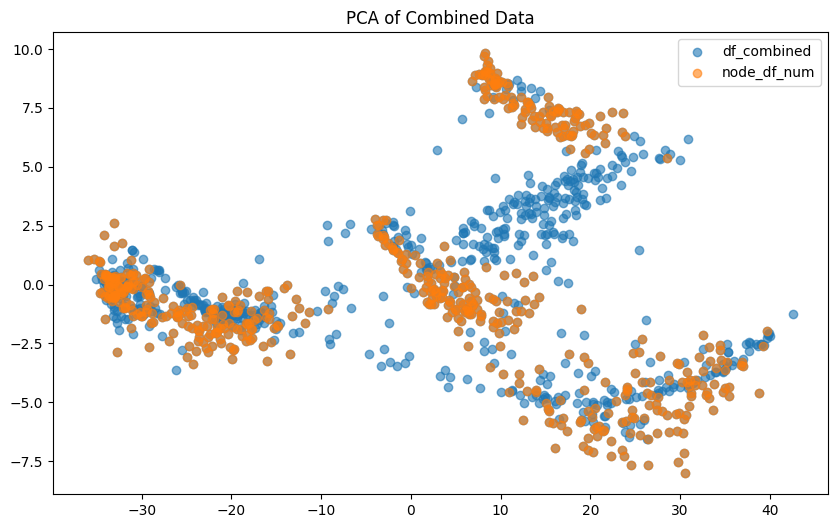

In [62]:
from sklearn.decomposition import PCA

# Combine both datasets for PCA
combined_data = np.vstack([df_combined_new.iloc[:,:-1].values,node_df_num.iloc[:, :-1].values])  # Exclude target and synthetic columns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:df_combined_new.shape[0], 0], pca_result[:df_combined_new.shape[0], 1], label="df_combined", alpha=0.6)
plt.scatter(pca_result[df_combined_new.shape[0]:, 0], pca_result[df_combined_new.shape[0]:, 1], label="node_df_num", alpha=0.6)
plt.legend()
plt.title("PCA of Combined Data")
plt.show()
